In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import time

In [2]:
Oct_19 = pd.read_csv('/Users/adorex/Downloads/e-BM/MSc Project and Dissertation/Dataset/2019-Oct.csv')
rfm_Oct_19 = Oct_19.loc[Oct_19['event_type'] == 'purchase',['user_id','event_time','price']]

In [3]:
Nov_19 = pd.read_csv('/Users/adorex/Downloads/e-BM/MSc Project and Dissertation/Dataset/2019-Nov.csv')
rfm_Nov_19 = Nov_19.loc[Nov_19['event_type'] == 'purchase',['user_id','event_time','price']]

In [4]:
Dec_19 = pd.read_csv('/Users/adorex/Downloads/e-BM/MSc Project and Dissertation/Dataset/2019-Dec.csv')
rfm_Dec_19 = Dec_19.loc[Dec_19['event_type'] == 'purchase',['user_id','event_time','price']]

In [5]:
Jan_20 = pd.read_csv('/Users/adorex/Downloads/e-BM/MSc Project and Dissertation/Dataset/2020-Jan.csv')
rfm_Jan_20 = Jan_20.loc[Jan_20['event_type'] == 'purchase',['user_id','event_time','price']]

In [6]:
Feb_20 = pd.read_csv('/Users/adorex/Downloads/e-BM/MSc Project and Dissertation/Dataset/2020-Feb.csv')
rfm_Feb_20 = Feb_20.loc[Feb_20['event_type'] == 'purchase',['user_id','event_time','price']]

In [7]:
Mar_20 = pd.read_csv('/Users/adorex/Downloads/e-BM/MSc Project and Dissertation/Dataset/2020-Mar.csv')
rfm_Mar_20 = Mar_20.loc[Mar_20['event_type'] == 'purchase',['user_id','event_time','price']]

In [8]:
Apr_20 = pd.read_csv('/Users/adorex/Downloads/e-BM/MSc Project and Dissertation/Dataset/2020-Apr.csv')
rfm_Apr_20 = Apr_20.loc[Apr_20['event_type'] == 'purchase',['user_id','event_time','price']]

In [9]:
rfm_data = pd.concat([rfm_Oct_19,rfm_Nov_19,rfm_Dec_19,rfm_Jan_20,rfm_Feb_20,rfm_Mar_20,rfm_Apr_20],axis=0)

In [10]:
rfm_data.drop_duplicates(inplace = True)

In [11]:
rfm_data.head()

,user_id,event_time,price
162,543272936,2019-10-01 00:02:14 UTC,130.76
308,551377651,2019-10-01 00:04:37 UTC,642.69
379,514591159,2019-10-01 00:06:02 UTC,29.51
442,555332717,2019-10-01 00:07:07 UTC,54.42
574,524601178,2019-10-01 00:09:26 UTC,189.91


In [12]:
rfm_data["event_time"] = rfm_data["event_time"].apply(lambda x:x[:-12])

In [14]:
rfm_data['event_time'] = pd.to_datetime(rfm_data['event_time'])

In [15]:
rfm_data.event_time = pd.to_datetime(rfm_data.event_time,format='%Y-%m-%d')

In [16]:
rfm_data.head()

,user_id,event_time,price
162,543272936,2019-10-01,130.76
308,551377651,2019-10-01,642.69
379,514591159,2019-10-01,29.51
442,555332717,2019-10-01,54.42
574,524601178,2019-10-01,189.91


In [18]:
# R data
rfm_data['gap'] = pd.to_datetime('2020-04-30') - rfm_data.event_time
rfm_data['gap'] = rfm_data['gap'].apply(lambda x:x.days) # delete days

In [21]:
# RFM data
rfm = rfm_data.groupby(['user_id']).agg({'gap':'min','event_time':'count','price':'sum'})
# rfm = (rfm - rfm.mean(axis = 0))/(rfm.std(axis = 0)) # standardisation (mean=0, standard deviation=1)
rfm.reset_index(inplace = True) # reset index
rfm.columns = ['User ID','R','F','M'] # renanme columns 
rfm.head()

,User ID,R,F,M
0,96369466,11,1,50.71
1,101875240,105,1,184.52
2,107620212,91,1,244.28
3,128029678,22,3,569.89
4,128968633,54,4,714.01


In [22]:
rfm.to_csv('/Users/adorex/Downloads/e-BM/MSc Project and Dissertation/Dataset/RFM.csv',index=False)

In [23]:
# Z-Score Standardisation ()
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scale_features = ['R', 'F', 'M']

rfm[scale_features] = ss.fit_transform(rfm[scale_features])

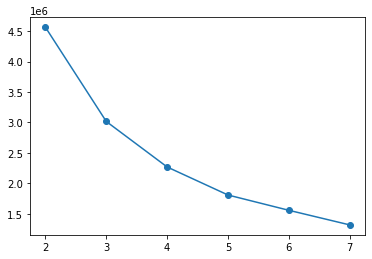

In [29]:
# SSE (the elbow method)
from sklearn.cluster import KMeans
sse = []
for i in range(2,8): 
  km = KMeans(n_clusters=i).fit(rfm.loc[:,['R','F','M']])
  sse.append(km.inertia_)
plt.plot(range(2,8),sse,marker='o')

In [ ]:
# Silhouette Coefficient
from sklearn.metrics import silhouette_score
score=[]
for i in range(2,8):
  km = KMeans(n_clusters=i).fit(rfm.loc[:,['R','F','M']])
  score.append(silhouette_score(rfm.loc[:,['R','F','M']],km.labels_))
plt.plot(range(2,8),score,marker='o')

In [31]:
# perform clustering with k=3
n_clusters = 3 
kmodel = KMeans(n_clusters=n_clusters).fit(rfm.loc[:,['R','F','M']])
kmodel

KMeans(n_clusters=3)

In [32]:
centroid = kmodel.cluster_centers_
centroid

array([[-7.79056829e-01,  3.68666183e-02,  7.29428140e-03],
       [ 9.83979664e-01, -1.42065211e-01, -1.00967456e-01],
       [-5.80742455e-01,  9.37049578e+00,  8.98190442e+00]])

In [33]:
y_pred = kmodel.labels_
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [34]:
# Add 'Category' to the rfm dataframe
rfm['Category'] = y_pred
rfm

,User ID,R,F,M,Category
0,96369466,-1.250928,-0.283642,-0.257533,0
1,101875240,0.264386,-0.283642,-0.220198,1
2,107620212,0.038701,-0.283642,-0.203523,0
3,128029678,-1.073604,-0.030772,-0.112671,0
4,128968633,-0.557752,0.095662,-0.072459,0
...,...,...,...,...,...
2064894,649770487,-1.428252,-0.283642,-0.231534,0
2064895,649770848,-1.428252,-0.157207,-0.076340,0
2064896,649771260,-1.428252,-0.283642,-0.172973,0
2064897,649772024,-1.428252,-0.283642,-0.252433,0


In [35]:
# View the number of customer in each category
rfm['Category'].value_counts()

0    1144191
1     911403
2       9305
Name: Category, dtype: int64

In [36]:
# Convert the number of customer in each category and centroids into tabular form, and concat them together
r1 = pd.Series(y_pred).value_counts() # the number of customer in each category
r2 = pd.DataFrame(centroid) # centroid
r = pd.concat([r2,r1],axis=1)
r.columns = list(rfm.loc[:,['R','F','M']]) + ['Cluster points']
r

,R,F,M,Cluster points
0,-0.779057,0.036867,0.007294,1144191
1,0.983980,-0.142065,-0.100967,911403
2,-0.580742,9.370496,8.981904,9305


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

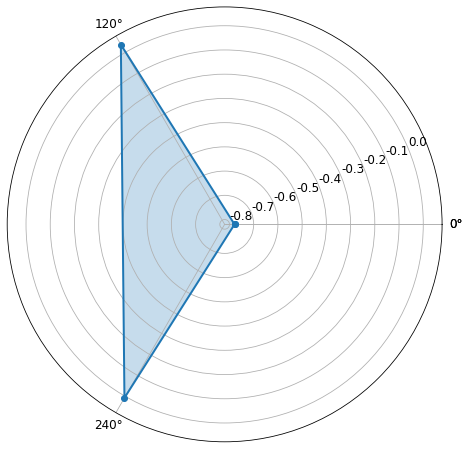

In [130]:
# Radar chart
max = r2.values.max()
min = r2.values.min()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
centre_num = r.values
feature = ['Recency','Frequency','Monetary Value']
N = len(feature)

for i, v in enumerate(centre_num):
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False) 
    centre = np.concatenate((v[:-1], [v[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    ax.plot(angles, centre, 'o-', linewidth=2, label="Category%d, %d"%(i+1,v[-1]))
    ax.fill(angles, centre, alpha=0.25)
    ax.set_thetagrids(angles * 180 / np.pi, feature, fontsize=15)
    ax.set_ylim(min - 0.1, max + 0.1)
    plt.title('Customer Segment Profile Chart', fontsize=22)
    ax.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), ncol=1, fancybox=True, shadow=True)

plt.show()